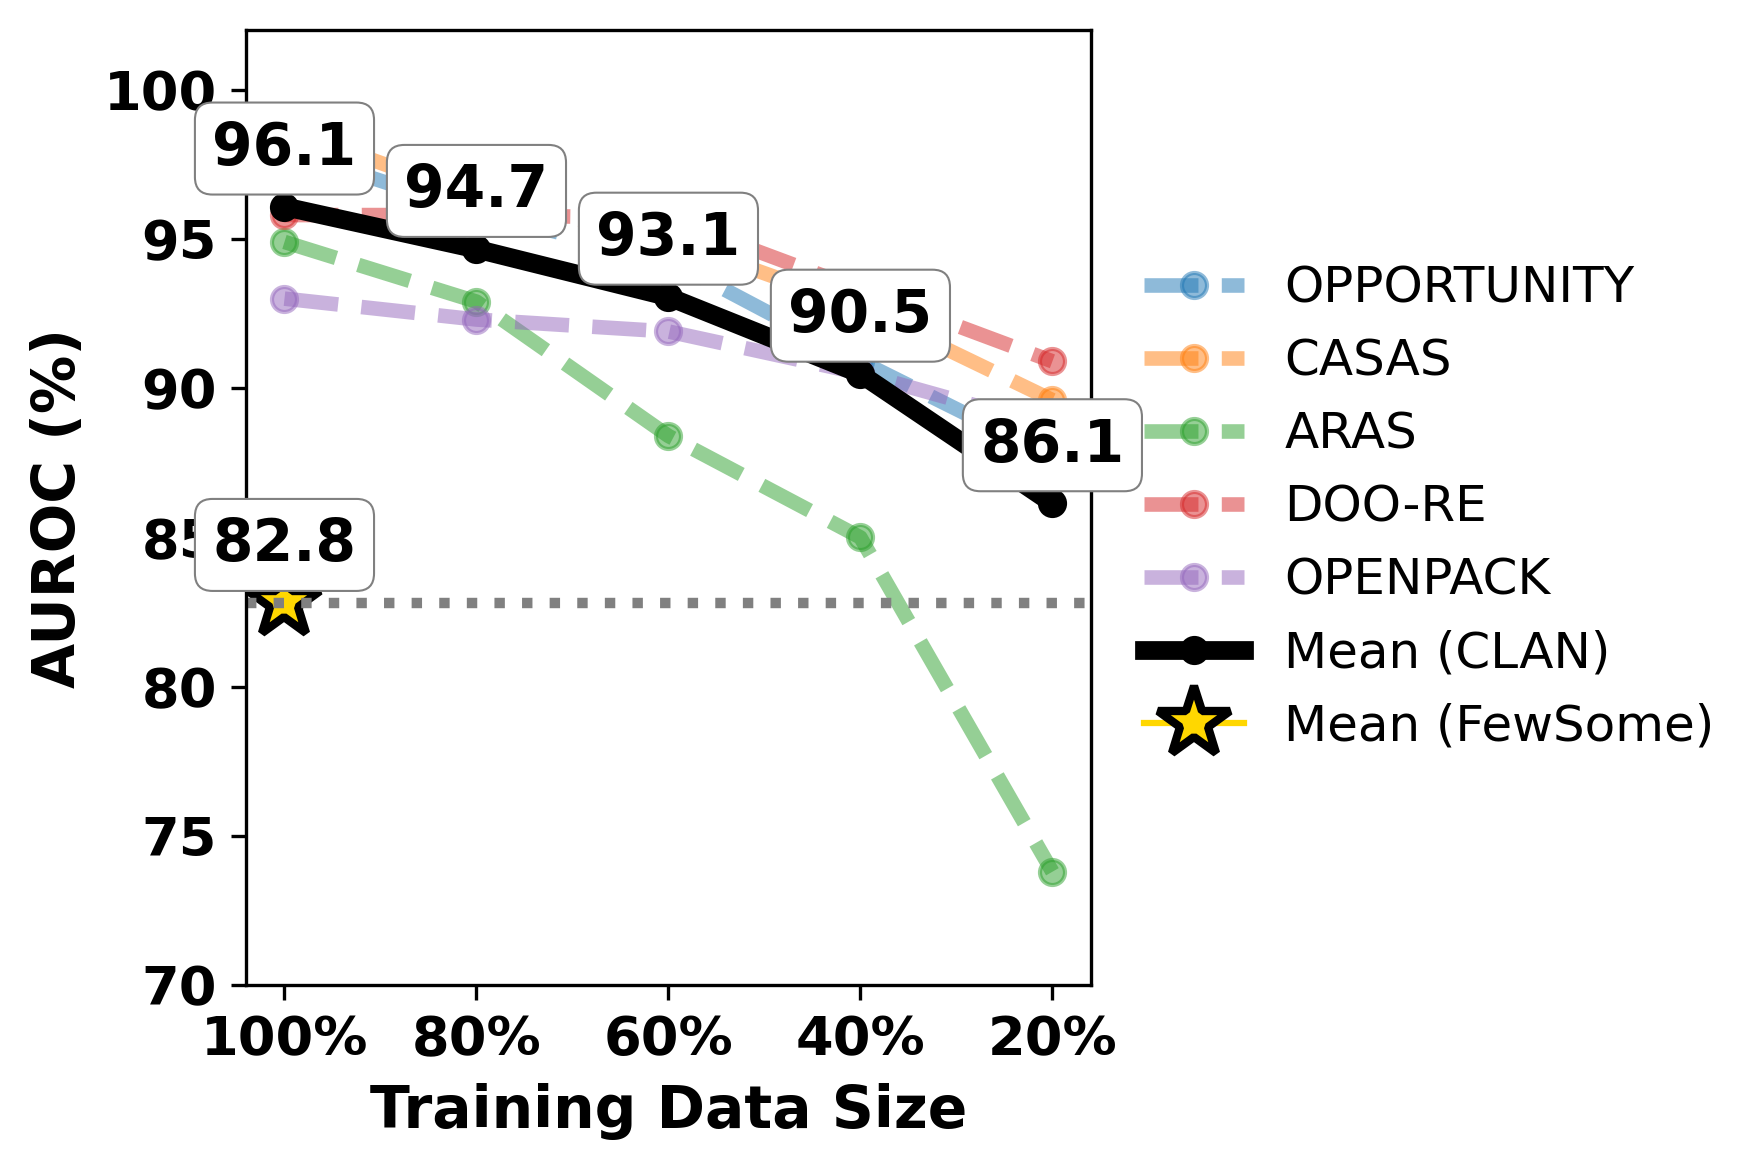

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Dataset and display settings
dataset_list = ['OPPORTUNITY', 'CASAS', 'ARAS', 'DOO-RE', 'OPENPACK']
x_labels = ['100%', '80%', '60%', '40%', '20%']
x = np.arange(len(x_labels))
palette = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']

# AUROC scores by dataset (rows) and data ratios (columns)
auroc_scores = np.array([
    [98.0, 95.9, 94.3, 90.9, 87.7],   # OPPORTUNITY                  
    [98.7, 96.4, 95.0, 92.7, 89.6],   # CASAS
    [94.9, 92.9, 88.4, 85.0, 73.8],   # ARAS
    [95.8, 95.8, 95.7, 93.3, 90.9],   # DOO-RE
    [93.0, 92.3, 91.9, 90.5, 88.7]    # OPENPACK
])

# Mean AUROC across all datasets
mean_scores = np.mean(auroc_scores, axis=0)

# Plot configuration
plt.figure(figsize=(6, 4), dpi=300)

# Plot each dataset's AUROC line (semi-transparent)
for i, dataset in enumerate(dataset_list):
    plt.plot(
        x, auroc_scores[i], label=dataset,
        marker='o', linestyle='--', linewidth=3.5,
        alpha=0.5, color=palette[i]
    )

# Plot mean line across datasets
plt.plot(
    x, mean_scores, label='Mean (CLAN)',
    marker='o', linestyle='-', linewidth=4.5, color='black'
)

# Annotate mean values above each point
for i, val in enumerate(mean_scores):
    plt.annotate(
        f'{val:.1f}', (x[i], val),
        textcoords="offset points", xytext=(0, 10),
        ha='center', fontsize=14, fontweight='bold',
        bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='gray', lw=0.5)
    )

# Baseline reference (e.g., FewSome)
fewsome_value = 82.8
plt.plot(
    x[0], fewsome_value,
    marker='*', color='gold', markersize=18,
    markeredgewidth=2.0, markeredgecolor='black',
    label='Mean (FewSome)'
)
plt.axhline(
    y=fewsome_value, linestyle=':', color='gray', linewidth=2.5
)
plt.annotate(
    f'{fewsome_value:.1f}', (x[0], fewsome_value),
    textcoords="offset points", xytext=(0, 10),
    ha='center', fontsize=14, fontweight='bold',
    bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='gray', lw=0.5)
)

# Axis settings
plt.xticks(x, x_labels, fontsize=13, fontweight='bold')
plt.yticks(np.arange(70, 105, 5), fontsize=13, fontweight='bold')
plt.xlabel("Training Data Size", fontsize=14, fontweight='bold')
plt.ylabel("AUROC (%)", fontsize=14, fontweight='bold')
plt.ylim([70, 102])

# Legend aligned to the right of the plot
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(
    handles=handles, labels=labels, fontsize=12,
    frameon=False, loc='center left', bbox_to_anchor=(1.01, 0.5)
)

# Final layout and save
plt.tight_layout()
plt.savefig("results/clan_data_size.png", dpi=300, bbox_inches='tight')
plt.show()


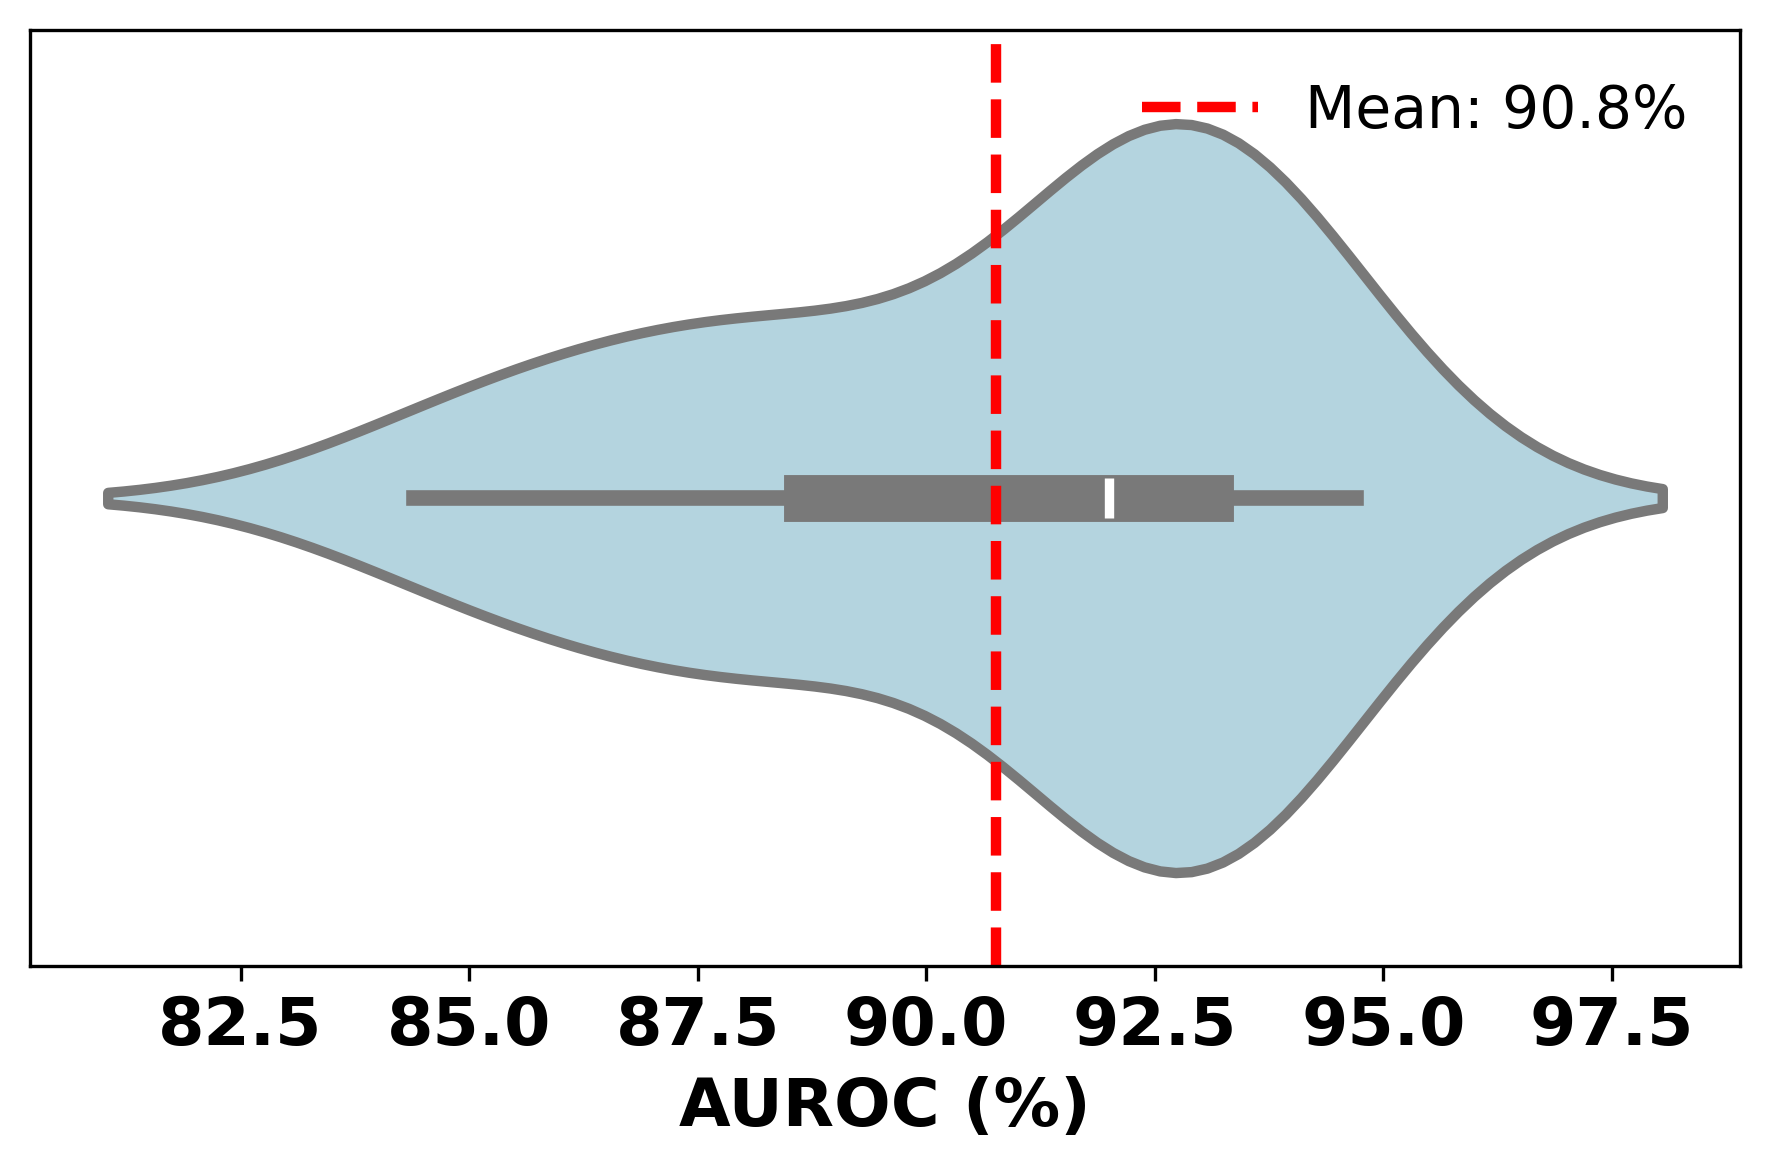

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- Data Setup ---

# User IDs (categorical)
user_ids = [
    '101', '102', '103', '104', '105', '106', '107', '108', '109', '110',
    '111', '201', '202', '203', '204', '205', '206', '207', '208', '209', '210'
]

# Corresponding AUROC values for each user
auroc_values = [
    92.0, 93.4, 92.3, 86.3, 94.7, 93.1, 89.2, 93.0, 87.5, 93.8,
    88.7, 92.6, 89.3, 91.8, 85.4, 93.6, 92.0, 84.4, 93.7, 87.4, 91.9
]

# Create DataFrame
df = pd.DataFrame({
    'User ID': user_ids,
    'AUROC': auroc_values
})

# --- Plotting ---

# Set up the figure
plt.figure(figsize=(6, 4), dpi=300)

# Draw violin plot (distribution of AUROC values)
sns.violinplot(
    data=df,
    x='AUROC',
    inner='box',         # Show boxplot inside violin
    linewidth=2.5,
    color="lightblue"
)

# Add a vertical line for the mean AUROC
mean_val = df['AUROC'].mean()
plt.axvline(
    x=mean_val,
    color='red',
    linestyle='--',
    linewidth=2.5,
    label=f'Mean: {mean_val:.1f}%'
)

# --- Axis and Labels ---

plt.xlabel("AUROC (%)", fontsize=16, fontweight='bold')
plt.yticks([])  # Remove y-axis ticks (categorical axis not needed here)
plt.xticks(fontsize=16, fontweight='bold')

# Legend configuration
plt.legend(fontsize=14, frameon=False, loc='upper right')

# Adjust layout and save figure
plt.tight_layout()
plt.savefig("results/violinplot.png", dpi=300, bbox_inches='tight')
plt.show()
